# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
pd.set_option('display.max_columns', None)

# First exploration

In [4]:
users_anime_df = pd.read_csv('../data/raw_data/animelist.csv')


In [5]:
anime_df = pd.read_csv('../data/raw_data/anime.csv')
#watching_status_df = pd.read_csv('./.data/raw_data/watching_status.csv')
#rating_complete_df = pd.read_csv('../data/raw_data/rating_complete.csv')
#anime_df_relevant_PG = pd.read_csv('../data/raw_data/anime_df_relevant_PG.csv')

In [6]:
anime_df.shape

(17562, 35)

In [7]:
anime_df.columns


Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [8]:
users_anime_df.shape

(109224747, 5)

In [9]:
users_anime_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


# Prepare full data set for visualization

In [10]:
anime_df.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)

In [11]:
users_anime_df.head(2)

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4


In [12]:
# take a fraction of full 100M lines
users_anime_sample = users_anime_df.sample(frac=0.05, random_state=42)

In [13]:
users_anime_sample.shape

(5461237, 5)

In [14]:
#merge anime_df with user_amine_sample
full_df_sample = anime_df.merge(users_anime_sample, on="anime_id", how='inner')


In [15]:
full_df_sample.shape

(5461237, 39)

# Visualization for audience

## N Most popular anime (ranking and completed and members)  bar chart on y axis

### Most popular anime by user score

In [16]:
full_df_sample.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes'],
      dtype='object')

In [17]:
full_df_sample.Ranked.replace(['Unknown'], -1,inplace = True)

In [18]:
full_df_sample.Ranked = full_df_sample.Ranked.apply(float)

In [19]:
full_df_sample.Ranked

0          28.0
1          28.0
2          28.0
3          28.0
4          28.0
           ... 
5461232    -1.0
5461233    -1.0
5461234    -1.0
5461235    -1.0
5461236    -1.0
Name: Ranked, Length: 5461237, dtype: float64

In [20]:
ranked = full_df_sample.sort_values(by='Ranked',ascending=True)

In [21]:
ranked = ranked[['Ranked','Name']]

In [22]:
ranked.Ranked=ranked.Ranked[ranked['Ranked']!=-1]

In [23]:
ranked.dropna(inplace=True)

In [24]:
ranked.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Ranked', ylabel='Name'>

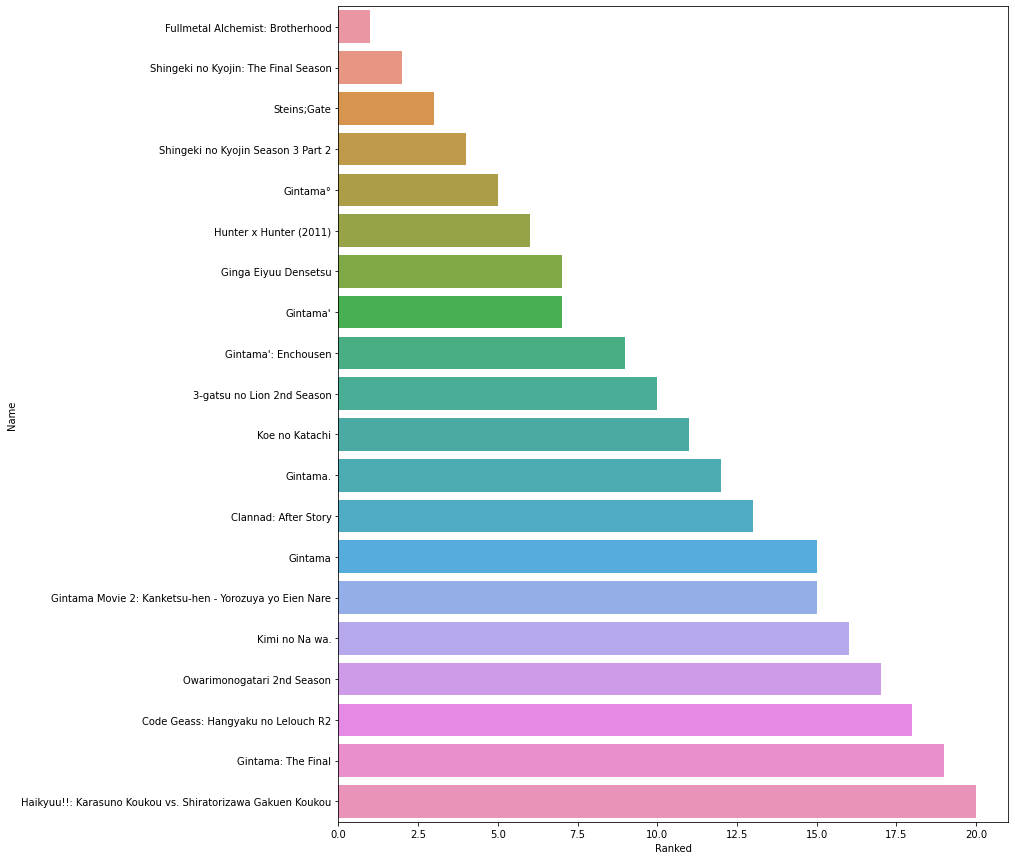

In [25]:
fig, ax = plt.subplots(figsize=(12,15))
#sns.set(font_scale=1)
sns.barplot(data=ranked.iloc[:20], y = 'Name',x='Ranked',ax=ax)

### Most popular fully watched anime


In [26]:
completed = full_df_sample.sort_values(by='Completed',ascending=False)

In [27]:
completed = completed[['Completed','Name']]

In [28]:
completed.dropna(inplace=True)

In [29]:
completed.drop_duplicates(inplace=True)

### Most popular anime by number of communities

In [30]:
members = full_df_sample.sort_values(by='Members',ascending=False)
members = members[['Members','Name']]
members.dropna(inplace=True)
members.drop_duplicates(inplace=True)

Text(0.5, 0, 'Community members')

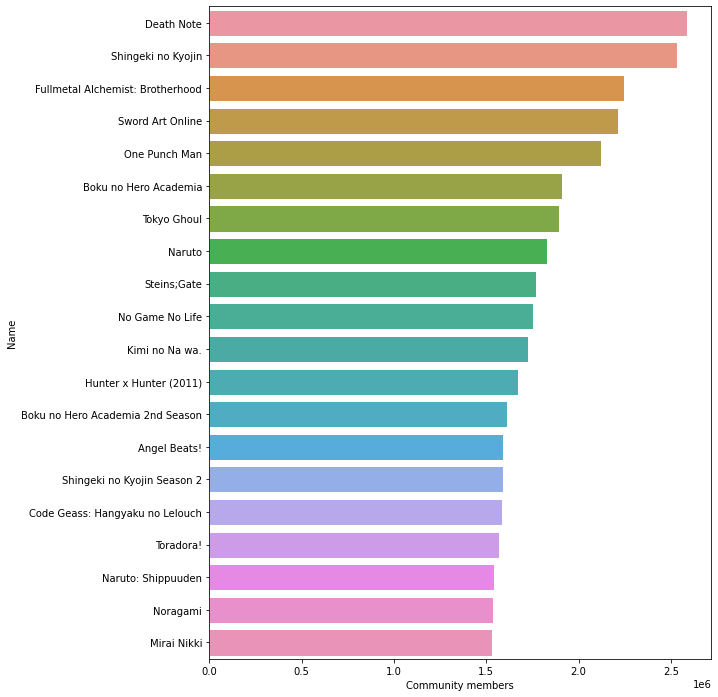

In [31]:
fig, ax = plt.subplots(figsize=(9,12))
sns.set(font_scale=1.1)
p2 = sns.barplot(data=members.iloc[:20], y = 'Name',x='Members',ax=ax)
p2.set_xlabel("Community members")

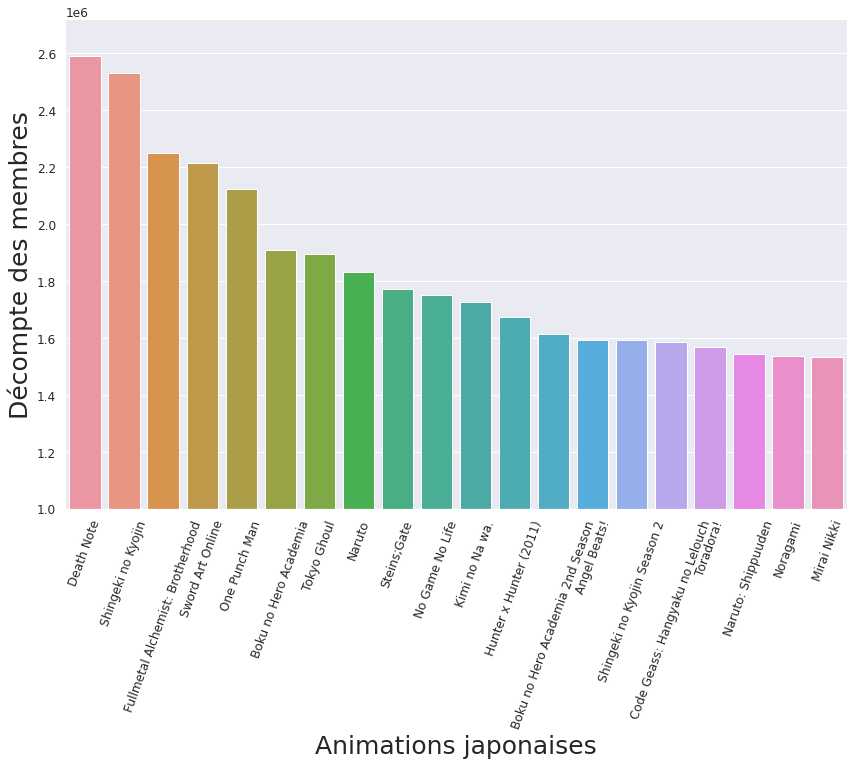

In [32]:
fig, ax = plt.subplots(figsize=(14,9))
sns.set(font_scale=1.1)
p2 = sns.barplot(data=members.iloc[:20], y = 'Members',x='Name',ax=ax)
p2.set_xlabel("Animations japonaises", fontsize=25)
p2.set_ylabel("Décompte des membres", fontsize=25)
p2.set(ylim=(1000000, None))
ax.tick_params(axis='x', rotation=70)

## N Most popular anime (user count )  bar chart on y axis -----> Tanguy made it

In [33]:
# FIND IT IN NOTEBOOK OF DIMITRI 

## Most popular anime genres

In [34]:
full_df_sample.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes'],
      dtype='object')

In [35]:
genres = pd.concat([full_df_sample.drop(columns =['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes']), full_df_sample['Genres'].str.get_dummies(sep=", ")], 1)

/tmp/ipykernel_590/303512086.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  genres = pd.concat([full_df_sample.drop(columns =['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',


In [36]:
genres.head(2)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
popular_genres = genres.apply(np.sum).sort_values(ascending=False)

In [38]:
popular_genres = popular_genres.to_frame()

In [39]:
popular_genres.reset_index(inplace = True)

In [40]:
popular_genres['index'].to_list()

['Comedy',
 'Action',
 'Romance',
 'Drama',
 'Fantasy',
 'School',
 'Shounen',
 'Supernatural',
 'Adventure',
 'Sci-Fi',
 'Slice of Life',
 'Mystery',
 'Ecchi',
 'Magic',
 'Seinen',
 'Super Power',
 'Harem',
 'Psychological',
 'Mecha',
 'Military',
 'Historical',
 'Horror',
 'Shoujo',
 'Demons',
 'Parody',
 'Thriller',
 'Sports',
 'Game',
 'Music',
 'Martial Arts',
 'Vampire',
 'Space',
 'Police',
 'Hentai',
 'Samurai',
 'Kids',
 'Dementia',
 'Josei',
 'Shoujo Ai',
 'Shounen Ai',
 'Cars',
 'Yaoi',
 'Yuri',
 'Unknown']

In [44]:
popular_genres

,index,0
0,Comedy,2581022
1,Action,2196210
2,Romance,1559383
3,Drama,1515872
4,Fantasy,1403415
5,School,1364918
6,Shounen,1320939
7,Supernatural,1318393
8,Adventure,1092528
9,Sci-Fi,1018944


In [45]:
popular_genres_clean = popular_genres.drop(index=[16, 33, 41, 42, 43])

In [64]:
popular_genres_clean

,index,0
0,Comedy,2581022
1,Action,2196210
2,Romance,1559383
3,Drama,1515872
4,Fantasy,1403415
5,School,1364918
6,Shounen,1320939
7,Supernatural,1318393
8,Adventure,1092528
9,Sci-Fi,1018944


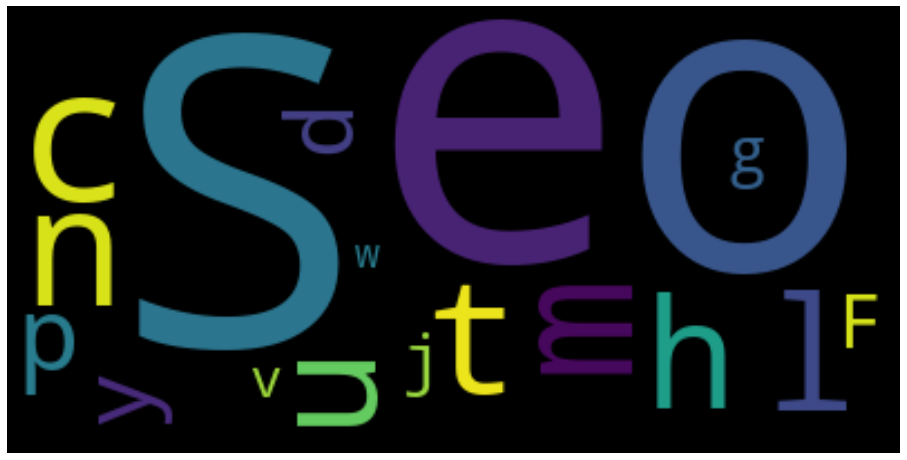

In [68]:
# Start with one review:
text = str(popular_genres_clean['index'].to_list())

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=1000, margin=10,
               random_state=1).generate(text = " ".join(text))

# Display the generated image:
plt.subplots(figsize=(16, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

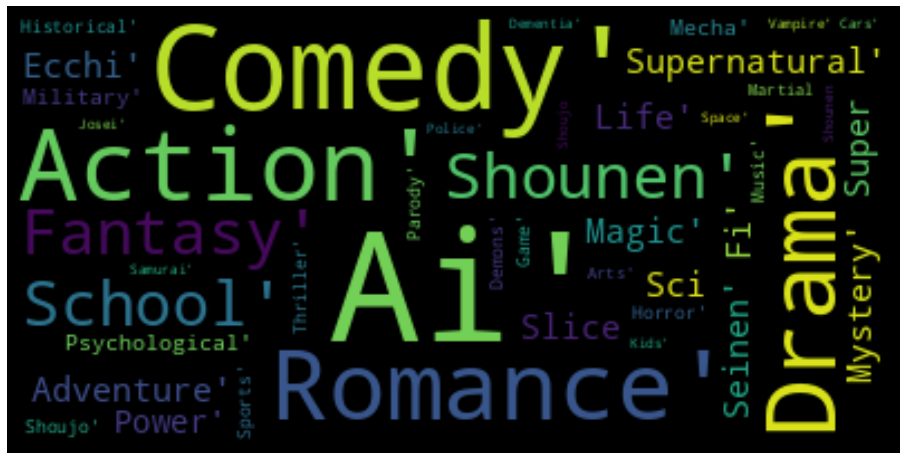

In [67]:
# Start with one review:
text = str(popular_genres_clean['index'].to_list())

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=1000, margin=10,
               random_state=1).generate(text)

# Display the generated image:
plt.subplots(figsize=(16, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

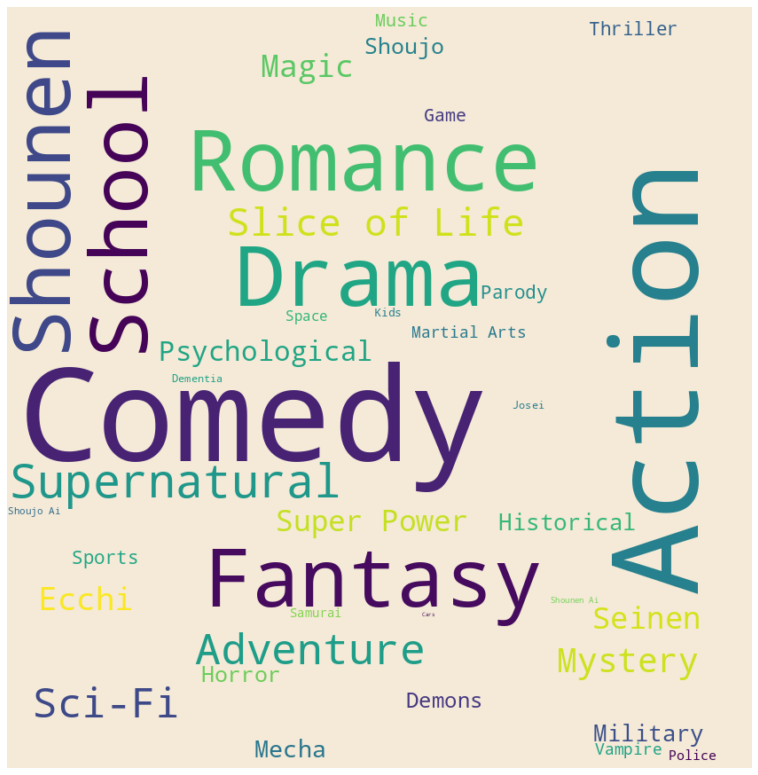

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path
import os
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# Start with one review:
#text = str(popular_genres_clean['index'].to_list())
#without '
text = dict(zip(popular_genres_clean['index'], popular_genres_clean[0]))
mask = np.array(Image.open(path.join(d, "images/pikachu-logo-115510579622mch5qulg6.png")))
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#f4ead7", mask=mask,
               random_state=1).generate_from_frequencies(text)
# Display the generated image:
plt.subplots(figsize=(16, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

v## Most popular Studios 

In [40]:
studios = full_df_sample.Studios.value_counts().to_frame().reset_index()

In [41]:
studios = studios.rename(columns={'index':'Studios', 'Studios':'count'})

In [42]:
studios[studios.Studios == 'Unknown']

,Studios,count
7,Unknown,175551


In [43]:
studios.drop([7],inplace=True)

In [44]:
top_50_studios = studios.iloc[:50]
top_10_studios = studios.iloc[:10]

In [45]:
sample_studios = studios.sample(8).sort_values(by='count',ascending=False)

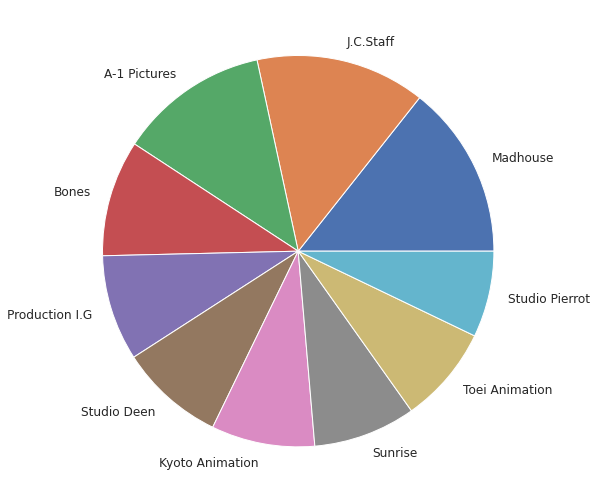

In [46]:
# Creating plot
fig = plt.figure(figsize =(14, 9))
#plt.pie(sample_studios['count'], labels = sample_studios['Studios'])
#plt.pie(studios['count'], labels = studios['Studios'])

plt.pie(top_10_studios['count'], labels = top_10_studios['Studios'])

# show plot
plt.show()

## Sources of anime: movie, OTA, TV - pie

In [47]:
source = full_df_sample.Source.value_counts().to_frame().reset_index()

In [48]:
source = source.rename(columns={'index':'Source', 'Source':'count'})

In [49]:
source[source.Source == 'Unknown']

,Source,count
8,Unknown,107930


In [50]:
source.index[source['Source']=='Unknown'].tolist()[0]

8

In [51]:
source.drop([source.index[source['Source']=='Unknown'].tolist()[0]],inplace=True)

In [52]:
top_10_sources = source.iloc[:10]

In [53]:
top_10_sources

,Source,count
0,Manga,2290010
1,Light novel,1008463
2,Original,964030
3,Visual novel,333608
4,Game,192561
5,Novel,160625
6,4-koma manga,155805
7,Web manga,131200
9,Other,69771
10,Music,18382


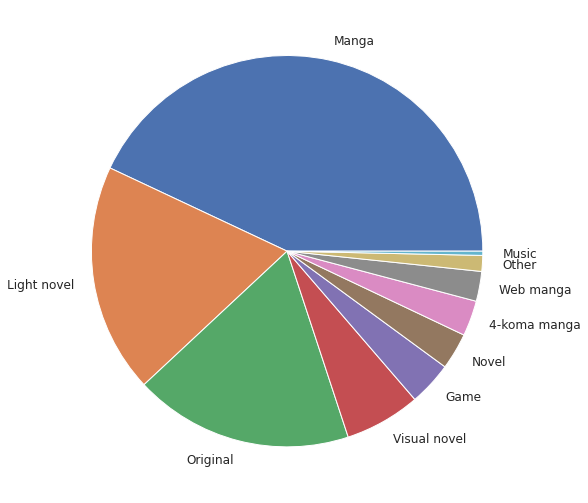

In [54]:
# Creating plot
fig = plt.figure(figsize =(14, 9))
#plt.pie(sample_studios['count'], labels = sample_studios['Studios'])
#plt.pie(studios['count'], labels = studios['Studios'])

plt.pie(top_10_sources['count'], labels = top_10_sources['Source'])

# show plot
plt.show()

## Community per anime 

## Count of animes accoding to PG rating

## How many anime each Studio produces

## What are the most popular anime according to watching or score or rank

## How many anime made per year 

## How many anime watched through years

## Anime duration

## Popularity  with duration (rank(?) vs duration?)

## Dropped anime 

## Top anime by number of episodes